# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
def import_libraries():
    """
    Imports required libraries for data analysis.
    """
    global pd, np, plt, sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set plot styles
    sns.set(style='whitegrid', palette='deep')
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14

    print("Libraries imported successfully.")


In [2]:
import_libraries()


Libraries imported successfully.


### Step 2: Load the Dataset into a DataFrame


In [3]:
def load_dataset(file_path):
    """
    Loads the dataset into a pandas DataFrame.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully. Shape: {df.shape}")
        return df
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None


In [34]:
# load your dataset from a specified file path.
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Update with your actual file path
df = load_dataset(file_path)

Dataset loaded successfully. Shape: (65437, 114)


### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
def identify_duplicates(df):
    """
    Identifies duplicate rows in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to check for duplicates.

    Returns:
        pd.DataFrame: DataFrame containing duplicate rows.
        int: Number of duplicate rows.
    """
    duplicates = df[df.duplicated()]
    num_duplicates = duplicates.shape[0]
    print(f"Number of duplicate rows: {num_duplicates}")
    return duplicates, num_duplicates


In [35]:
# load your dataset from a specified file path.
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Update with your actual file path
df = load_dataset(file_path)
duplicates, num_duplicates = identify_duplicates(df)

Dataset loaded successfully. Shape: (65437, 114)
Number of duplicate rows: 0


In [8]:
def remove_duplicates(df):
    """
    Removes duplicate rows from the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to remove duplicates from.

    Returns:
        pd.DataFrame: DataFrame with duplicates removed.
    """
    initial_shape = df.shape
    df.drop_duplicates(inplace=True)
    final_shape = df.shape
    print(f"Duplicates removed. DataFrame shape changed from {initial_shape} to {final_shape}.")
    return df


In [36]:
# load your dataset from a specified file path.
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Update with your actual file path
df = load_dataset(file_path)
df = remove_duplicates(df)

Dataset loaded successfully. Shape: (65437, 114)
Duplicates removed. DataFrame shape changed from (65437, 114) to (65437, 114).


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [11]:
def missing_in_column(df, column_name):
    """
    Finds the number of missing values in a specific column.

    Parameters:
        df (pd.DataFrame): The DataFrame to check.
        column_name (str): The column to inspect.

    Returns:
        int: Number of missing values in the column.
    """
    missing_count = df[column_name].isnull().sum()
    print(f"Number of missing values in '{column_name}': {missing_count}")
    return missing_count


In [37]:
# load your dataset from a specified file path.
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Update with your actual file path
df = load_dataset(file_path)

# Remove the duplicate rows from the dataframe.
df = remove_duplicates(df)

missing_CodingActivities = missing_in_column(df, 'CodingActivities')


Dataset loaded successfully. Shape: (65437, 114)
Duplicates removed. DataFrame shape changed from (65437, 114) to (65437, 114).
Number of missing values in 'CodingActivities': 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


Imputing missing values in the 'CodingActivities' column using forward-fill is an effective method when you expect that the missing values can be reasonably filled by the last known value.

This approach is particularly suitable for time-series data or when the data has a logical sequential order.

In [13]:
def impute_coding_activities_ffill(df):
    """
    Imputes missing values in the 'CodingActivities' column using forward-fill.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the 'CodingActivities' column.

    Returns:
        pd.DataFrame: The DataFrame with missing 'CodingActivities' values imputed.
    """
    import pandas as pd

    # Check if 'CodingActivities' column exists
    if 'CodingActivities' in df.columns:
        # Count missing values before imputation
        missing_before = df['CodingActivities'].isnull().sum()
        print(f"Missing values in 'CodingActivities' before imputation: {missing_before}")

        # Perform forward-fill imputation
        df['CodingActivities'].fillna(method='ffill', inplace=True)

        # Count missing values after imputation
        missing_after = df['CodingActivities'].isnull().sum()
        print(f"Missing values in 'CodingActivities' after imputation: {missing_after}")

        # Handle any remaining missing values at the start of the DataFrame
        if missing_after > 0:
            print("Note: Some missing values couldn't be imputed with forward-fill (they might be at the beginning of the DataFrame). Consider using backward-fill for these.")
            # Optional: Uncomment the following line to apply backward-fill
            # df['CodingActivities'].fillna(method='bfill', inplace=True)

    else:
        print("The 'CodingActivities' column does not exist in the DataFrame.")

    return df


In [33]:
# Step 1: Import Required Libraries
import pandas as pd

# Step 2: Load your dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Update with your actual file path
df = load_dataset(file_path)

# Step 3: Impute missing values in 'CodingActivities'
df = impute_coding_activities_ffill(df)

Dataset loaded successfully. Shape: (65437, 114)
Missing values in 'CodingActivities' before imputation: 10971
Missing values in 'CodingActivities' after imputation: 0


C:\Users\tdhoa\AppData\Local\Temp\ipykernel_19108\2375513216.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method='ffill', inplace=True)
C:\Users\tdhoa\AppData\Local\Temp\ipykernel_19108\2375513216.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)


**Considerations:**

- Data Sorting: Ensure that the DataFrame is sorted appropriately before applying forward-fill. If there's a time component or specific order to your data, sort it accordingly to maintain data integrity.

- Data Suitability: Forward-fill is suitable when you expect that missing values can be reasonably assumed to be the same as the previous entry. This might not be appropriate for all datasets or columns.

- Alternative Methods: If forward-fill isn't appropriate, consider other imputation methods such as backward-fill (bfill), interpolation, or filling with statistics like mean, median, or mode.

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [18]:
def check_compensation_columns(df):
    """
    Identifies compensation-related columns in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        comp_columns (list): A list of column names that are compensation-related.
    """
    import pandas as pd

    # Define keywords that are commonly found in compensation-related column names
    compensation_keywords = ['comp', 'salary', 'pay', 'earn', 'income', 'remuneration', 'wage', 'bonus', 'benefit']

    # Initialize an empty list to store compensation-related column names
    comp_columns = []

    # Iterate over the columns in the DataFrame
    for col in df.columns:
        # Convert column name to lowercase for case-insensitive comparison
        col_lower = col.lower()
        # Check if any of the compensation keywords are in the column name
        if any(keyword in col_lower for keyword in compensation_keywords):
            comp_columns.append(col)

    # Provide feedback to the user
    if comp_columns:
        print("Compensation-related columns found:")
        for col in comp_columns:
            print(f" - {col}")
    else:
        print("No compensation-related columns were found in the DataFrame.")

    return comp_columns


Integrating the Function into Your Workflow

In a data analysis pipeline, you can incorporate the function as follows:

In [ ]:
def summarize_compensation_columns(df):
    comp_columns = check_compensation_columns(df)
    
    if comp_columns:
        for col in comp_columns:
            # Ensure the column is numeric
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # Display descriptive statistics
            print(f"\nDescriptive statistics for '{col}':")
            print(df[col].describe())
    else:
        print("No compensation-related columns to summarize.")


In [32]:
# Load your dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Update with your actual file path
df = load_dataset(file_path)
summarize_compensation_columns(df)

Dataset loaded successfully. Shape: (65437, 114)
Compensation-related columns found:
 - LearnCode
 - LearnCodeOnline
 - CompTotal
 - AIComplex
 - ConvertedCompYearly

Descriptive statistics for 'LearnCode':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: LearnCode, dtype: float64

Descriptive statistics for 'LearnCodeOnline':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: LearnCodeOnline, dtype: float64

Descriptive statistics for 'CompTotal':
count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

Descriptive statistics for 'AIComplex':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: AIComplex, dtype: float64

Descriptive statistics for 'Conve

##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


Normalizing your ConvertedCompYearly column using Min-Max Scaling is a smart move to ensure all your data is on a comparable scale, especially if you're gearing up for machine learning algorithms or statistical analyses that are sensitive to the magnitude of different features. Let's create a function that accomplishes this, and I'll walk you through each step to make it crystal clear.

**Understanding Min-Max Scaling**

Min-Max Scaling, also known as Normalization, rescales the data to a fixed range—usually between 0 and 1. This technique preserves the relationships among the original data values while adjusting the scale. The formula for Min-Max Scaling is:

Normalized Value = (Value − Minimum Value)/(Maximum Value - Minimum Value)

**Why Normalize Compensation Data?**
- Algorithms Sensitivity: Some machine learning algorithms, like k-NN and neural networks, perform better when features are on a similar scale.

- Interpretability: Normalized data can make comparisons across features more intuitive.

- Convergence Speed: Gradient descent algorithms converge faster on normalized data.

In [39]:
def normalize_converted_comp_yearly(df):
    """
    Normalizes the 'ConvertedCompYearly' column in the DataFrame using Min-Max Scaling.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the 'ConvertedCompYearly' column.

    Returns:
        pd.DataFrame: The DataFrame with an additional column 'ConvertedCompYearly_MinMax '.
    """
    import pandas as pd
    import numpy as np

    # Check if 'ConvertedCompYearly' exists in the DataFrame
    if 'ConvertedCompYearly' not in df.columns:
        print("The DataFrame does not contain the 'ConvertedCompYearly' column.")
        return df

    # Copy the DataFrame to avoid modifying the original data
    df = df.copy()

    # Ensure 'ConvertedCompYearly' is numeric
    df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

    # Handle missing values by filling with the median
    median_value = df['ConvertedCompYearly'].median()
    df['ConvertedCompYearly'].fillna(median_value, inplace=True)
    print(f"Filled missing values with median: {median_value}")

    # Calculate the minimum and maximum values
    min_value = df['ConvertedCompYearly'].min()
    max_value = df['ConvertedCompYearly'].max()
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")

    # Apply Min-Max Scaling
    df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_value) / (max_value - min_value)

    # Handle potential division by zero if max equals min
    if min_value == max_value:
        df['ConvertedCompYearly_MinMax'] = 0.0  # All values are the same

    # Return the DataFrame with the new normalized column
    return df


In [40]:
# Load your dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Update with your actual file path
df = load_dataset(file_path)

# Normalize 'ConvertedCompYearly'
df = normalize_converted_comp_yearly(df)


Dataset loaded successfully. Shape: (65437, 114)
Filled missing values with median: 65000.0
Minimum value: 1.0
Maximum value: 16256603.0


C:\Users\tdhoa\AppData\Local\Temp\ipykernel_19108\4190341625.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_value, inplace=True)


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


Normalizing your ConvertedCompYearly column using **Z-score normalization** (also known as **Standardization**) is a fantastic approach to prepare your data for many statistical analyses and machine learning algorithms.

This method transforms your data such that it has a mean of 0 and a standard deviation of 1, effectively centering and scaling your data.

Let's dive into crafting a function that accomplishes this, and I'll walk you through each step to ensure clarity and depth.

**Understanding Z-score Normalization**
Z-score normalization rescales the data based on the mean (𝜇) and standard deviation (𝜎) of the feature. The formula is:

Standardized Value = (Value − 𝜇)/𝜎

This transformation results in a dataset where the values represent the number of standard deviations away from the mean.

**Why Use Z-score Normalization?**
- Centering Data: Adjusts data to have a mean of 0, which can be beneficial for algorithms sensitive to data distributions.

- Scaling: Standardizes the variance to 1, aiding in algorithms that assume equal variance among features.

- Handling Outliers: Less affected by extreme values compared to Min-Max Scaling.

In [41]:
def standardize_converted_comp_yearly(df):
    """
    Standardizes the 'ConvertedCompYearly' column in the DataFrame using Z-score normalization.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the 'ConvertedCompYearly' column.
    
    Returns:
        pd.DataFrame: The DataFrame with an additional column 'ConvertedCompYearly_Zscore'.
    """
    import pandas as pd
    import numpy as np

    # Check if 'ConvertedCompYearly' exists in the DataFrame
    if 'ConvertedCompYearly' not in df.columns:
        print("The DataFrame does not contain the 'ConvertedCompYearly' column.")
        return df

    # Copy the DataFrame to avoid modifying the original data
    df = df.copy()

    # Ensure 'ConvertedCompYearly' is numeric
    df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

    # Handle missing values by filling with the median
    median_value = df['ConvertedCompYearly'].median()
    df['ConvertedCompYearly'].fillna(median_value, inplace=True)
    print(f"Filled missing values with median: {median_value}")

    # Calculate the mean and standard deviation
    mean_value = df['ConvertedCompYearly'].mean()
    std_dev = df['ConvertedCompYearly'].std()
    print(f"Mean value: {mean_value}")
    print(f"Standard deviation: {std_dev}")

    # Apply Z-score normalization
    df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_value) / std_dev

    # Return the DataFrame with the new standardized column
    return df


In [42]:
df = standardize_converted_comp_yearly(df)

Filled missing values with median: 65000.0
Mean value: 72576.3582835399
Standard deviation: 112220.68159721408


C:\Users\tdhoa\AppData\Local\Temp\ipykernel_19108\3005258103.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_value, inplace=True)


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


Visualizing the distributions of ConvertedCompYearly, ConvertedCompYearly_Normalized, and ConvertedCompYearly_Standardized is an excellent way to understand how the data transformations impact the shape and scale of your compensation data. Let's dive into creating these visualizations using Python's matplotlib and seaborn libraries.

Dataset loaded successfully. Shape: (65437, 114)


C:\Users\tdhoa\AppData\Local\Temp\ipykernel_19108\3659525851.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_comp, inplace=True)


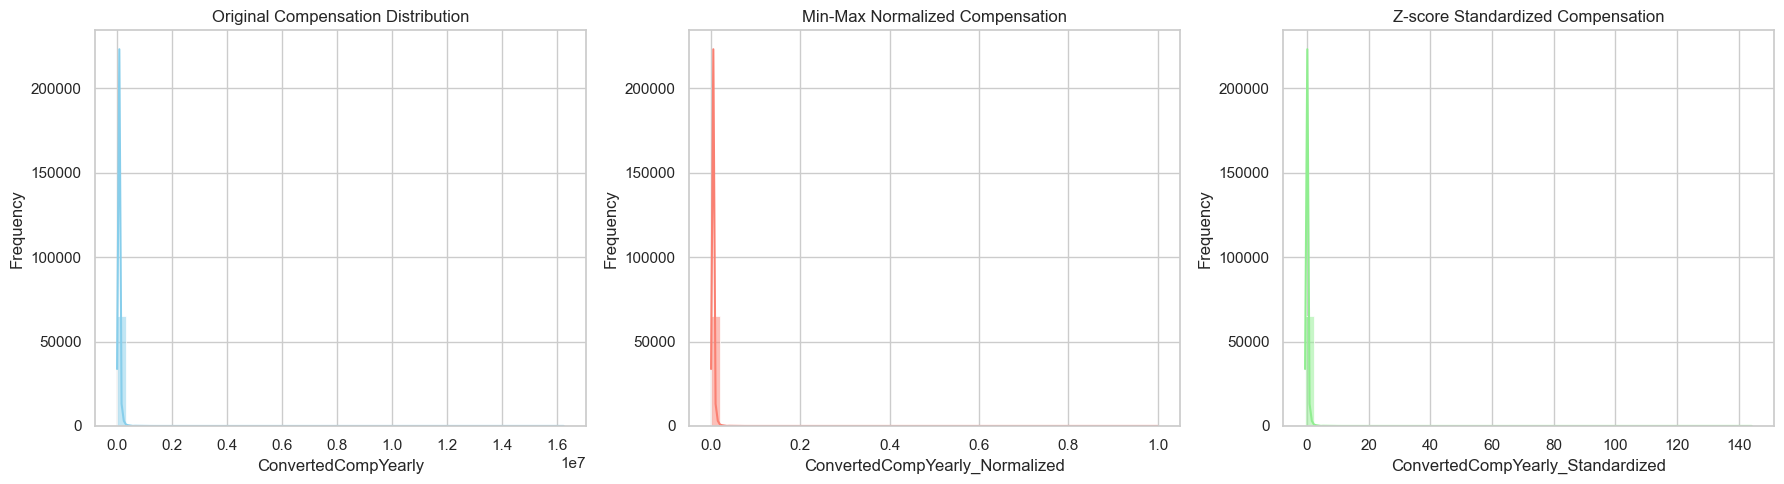

In [43]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the Data
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"  # Update with your actual file path
df = load_dataset(file_path)

# Ensure that ConvertedCompYearly is numeric and handle missing values:
# Convert to numeric, coercing errors
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Fill missing values with the median
median_comp = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_comp, inplace=True)

# Normalize and Standardize the Data
# Calculate min and max values
min_comp = df['ConvertedCompYearly'].min()
max_comp = df['ConvertedCompYearly'].max()

# Apply Min-Max normalization
df['ConvertedCompYearly_Normalized'] = (df['ConvertedCompYearly'] - min_comp) / (max_comp - min_comp)

# Z-score Standardization
# Calculate mean and standard deviation
mean_comp = df['ConvertedCompYearly'].mean()
std_comp = df['ConvertedCompYearly'].std()

# Apply Z-score standardization
df['ConvertedCompYearly_Standardized'] = (df['ConvertedCompYearly'] - mean_comp) / std_comp

# Visualize the Distributions
# We'll create side-by-side histograms with KDE (Kernel Density Estimate) plots for each variable.
# Set the style for seaborn
sns.set(style='whitegrid', palette='muted')

# Create subplots
plt.figure(figsize=(18, 5))

# Original Compensation Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='skyblue')
plt.title('Original Compensation Distribution')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# Normalized Compensation Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['ConvertedCompYearly_Normalized'], bins=50, kde=True, color='salmon')
plt.title('Min-Max Normalized Compensation')
plt.xlabel('ConvertedCompYearly_Normalized')
plt.ylabel('Frequency')

# Standardized Compensation Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['ConvertedCompYearly_Standardized'], bins=50, kde=True, color='lightgreen')
plt.title('Z-score Standardized Compensation')
plt.xlabel('ConvertedCompYearly_Standardized')
plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


**Interpret the Visualizations**

a. Original Compensation Distribution

    - Scale: The x-axis represents the actual compensation amounts in their original units (e.g., USD).

    - Shape: Likely right-skewed due to high-income outliers.

    - Insights:

        - The majority of respondents earn below a certain threshold.

        - A long tail indicates a smaller number of high earners.

b. Min-Max Normalized Compensation

    - Scale: Values range between 0 and 1.

    - Shape: Mirrors the original distribution's shape but rescaled.

    - Insights:

        - The relative positions of data points are preserved.

        - Useful for algorithms sensitive to the scale of input data.

c. Z-score Standardized Compensation

    - Scale: Centered around 0 with a standard deviation of 1.

    - Shape: The distribution retains its original shape.

    - Insights:

        - Negative values indicate compensation below the mean.

        - Positive values represent compensation above the mean.

        - Highlights how many standard deviations a value is from the mean.